In [1]:
import numpy as np
import funciones

/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [5]:
A1 = np.array([[0.186, 0.521,0.014 ,0.32 ,0.134],
[0.24, 0.073 , 0.219 , 0.013 , 0.327],
[0.098, 0.12, 0.311, 0.302, 0.208],
[0.173, 0.03, 0.133, 0.14, 0.074],
[0.303, 0.256, 0.323, 0.225, 0.257]])


In [7]:
A2 =np.array([[0.186, 0.521, 0.014, 0.32, 0.134],
[0.24, 0.073, 0.219, 0.013, 0.327],
[0.098, 0.12, 0.311, 0.302, 0.208],
[0.173, 0.03, 0.133, 0.14, 0.074],
[0.003, 0.256, 0.323, 0.225, 0.257]])


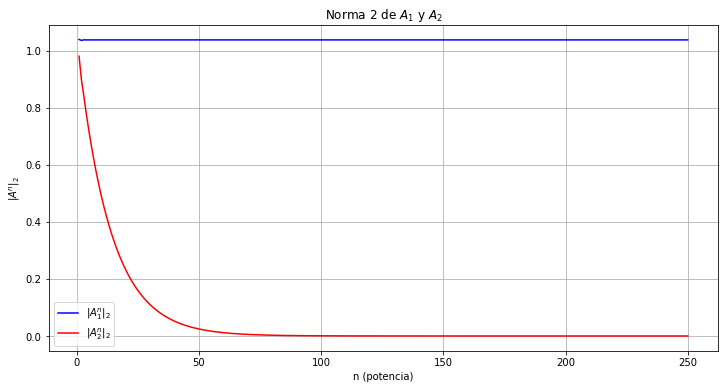

In [6]:
import numpy as np
import scipy.linalg
import matplotlib.pyplot as plt

N = 250

#Creamos dos listas vacias para guardar las normas cuando las calculemos
a1 = []
a2 = [] 


for n in range(1, N + 1):

    identidad = np.diag(np.ones(len(A1))) #Definimos la Matriz Identidad
    
    #Inicialmente las Matriz A^n seran la matriz identidad
    A1_n = identidad
    A2_n = identidad

    for j in range(n):

        #Multiplicamos A1_n por A1, inicialmente es la misma matriz, luego A1^2, A1^3 hasta A1^n
        A1_n = np.dot(A1_n, A1)
        #Multiplicamos A2_n por A2, inicialmente es la misma matriz, luego A2^2, A2^3 hasta A2^n
        A2_n = np.dot(A2_n, A2)

    #Guardamos en una lista las normas2
    a1.append(scipy.linalg.norm(A1_n, ord=2))
    a2.append(scipy.linalg.norm(A2_n, ord=2))

# Gráfica de los resultados
plt.figure(figsize=(12, 6))
plt.plot(range(1, 251), a1, label=r'$\|A_1^n\|_2$', color='blue')
plt.plot(range(1, 251), a2, label=r'$\|A_2^n\|_2$', color='red')
plt.xlabel('n (potencia)')
plt.ylabel(r'$\|A^n\|_2$')
plt.title('Norma 2 de $A_1$ y $A_2$')
plt.legend()
plt.grid(True)
plt.show()

In [9]:
import numpy as np
import scipy.linalg
import matplotlib.pyplot as plt

identidad = np.diag(np.ones(len(A1))) #Definimos la Matriz Identidad

#Creamos dos listas vacias para guardar las normas cuando las calculemos
a1 = []
a2 = [] 
A2_serie = []

N = [10,100] #Lista para los distintos valores de n

for n in (N):

    #Inicialmente las Matriz A^n seran la matriz identidad
    A1_n = np.copy(identidad)
    A2_n = np.copy(identidad)

    #Llamamos serie a la matriz que ira sumando los distintos A
    #Inicialmente es la identidad porque en la serie se empieza con I + A
    serie1 = np.copy(identidad)
    serie2 = np.copy(identidad)

    for j in range(n):

        #Multiplicamos A1_n por A1, inicialmente es la misma matriz, luego A1^2, A1^3 hasta A1^n
        A1_n = np.dot(A1_n, A1)
        #Sumamos las matrices de la serie, inicialmente tenemos I + A2, luego I + A1 + A1^2, hasta I + A1 + ... + A1^n
        serie1 = serie1 + A1_n
        #Guardamos en la lista la norma 2 cuando sumamos cada termino
        a1.append(scipy.linalg.norm(serie1, ord=2))

        #Multiplicamos A2_n por A2, inicialmente es la misma matriz, luego A2^2, A2^3 hasta A2^n
        A2_n = np.dot(A2_n, A2)
        #Sumamos las matrices de la serie, inicialmente tenemos I + A2, luego I + A2 + A2^2, hasta I + A2 + ... + A2^n
        serie2 = serie2 + A2_n
        #Guardamos en la lista la norma 2 cuando sumamos cada termino
        a2.append(scipy.linalg.norm(serie2, ord=2))

        A2_serie.append(serie2)

Ahora vamos a graficar la serie de potencias para $(I − A)^{−1}$ de $A_1$ y $A_2$ para $n = 10$ y $n = 100$. Primero vamos a graficar $A_1$

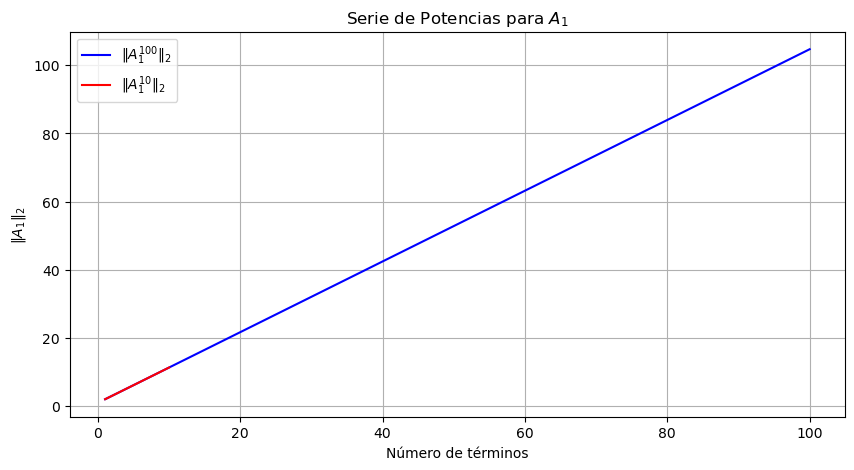

In [15]:
plt.figure(figsize=(10, 5))
plt.plot(range(1, 100 + 1), a1[10:110], label=r'$\|A_1^{100}\|_2$', color='blue')
plt.plot(range(1, 10 + 1), a1[0:10], label=r'$\|A_1^{10}\|_2$', color='red')
plt.xlabel('Número de términos')
plt.ylabel(r'$\|A_1\|_2$')
plt.title(r'Serie de Potencias para $A_1$')
plt.legend()
plt.grid()
plt.show()

Ahora graficamos la serie de potencias para $A_2$

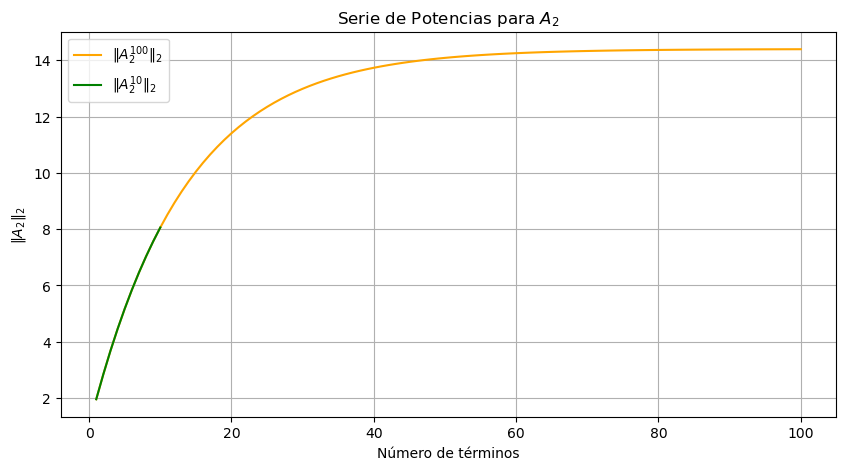

In [13]:
plt.figure(figsize=(10, 5))
plt.plot(range(1, 100 + 1), a2[10:110], label=r'$\|A_2^{100}\|_2$', color='orange')
plt.plot(range(1, 10 + 1), a2[0:10], label=r'$\|A_2^{10}\|_2$', color='green')
plt.xlabel('Número de términos')
plt.ylabel(r'$\|A_2\|_2$')
plt.title(r'Serie de Potencias para $A_2$')
plt.legend()
plt.grid()
plt.show()

CONVERGENCIA

Ahora vamos a graficar el error obtenido como el vector
$$e(n) = ||(I + A + A^1 + A^2 + ... + A^n) - (I - A)^{-1}||_2$$

Primero calculamos $(I - A)^{-1}$ utilizando LU y luego proceguimos

In [29]:
identidad = np.diag(np.ones(len(A2))) # Creamos la matriz identidad

L, U, P = funciones.calcularLU(identidad - A2) #calculamos LU de (I - A)


In [30]:
a2 = []

N = [10,100]

for n in (N):

    A2_n = np.copy(identidad)
    serie2 = np.copy(identidad)

    for j in range(n):

        A2_n = np.dot(A2_n, A2)
        serie2 = serie2 + A2_n
        a2.append(serie2)

In [31]:
#Creamos una lista vacia para guardar los resultados de norma2
h = []

#Iteramos la lista a2 la cual contiene en cada fila la serie de potencias, I + A, I + A + A^2, I + A + A^2 + A^3, hasta n
#Lo hacemos desde la fila 10 porque las 10 primeras corresponden a n = 10, segun guardamos la lista

for j in a2[10:110]:

    #Restamos la serie a (I-A)⁻1
    fila = j - funciones.inversaLU(L,U,P)

    #guardamos en una lista la norma2 de la resta
    h.append(scipy.linalg.norm(fila, ord=2))

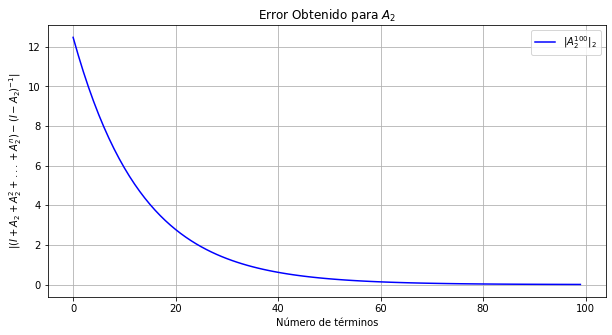

In [32]:
plt.figure(figsize=(10, 5))
plt.plot(h, label=r'$\|A_2^{100}\|_2$', color='blue')
plt.xlabel('Número de términos')
plt.ylabel(r'$\|(I + A_2 + A_2^2 + ... + A_2^n)-(I-A_2)^{-1}\|$')
plt.title(r'Error Obtenido para $A_2$')
plt.legend()
plt.grid()
plt.show()

# Consigna 5

Primero reutilizamos el codigo del TP1 para calcular $A^{ss}$ y $A^{rr}$

In [45]:
import pandas as pd

matriz = pd.read_excel('matrizlatina2011_compressed_0.xlsx', sheet_name="LAC_IOT_2011")

matriz_col_nic = matriz[(matriz['Country_iso3'] == 'COL') | (matriz['Country_iso3'] == 'NIC')]

columnas_base = []
columnas_col = []
columnas_nic = []   

for i in matriz_col_nic.columns:
    if "Country_iso3" in str(i) or "Output" in str(i):
        columnas_base.append(i)
    elif "COLs" in str(i):
        columnas_col.append(i)
    elif "NICs" in str(i):
        columnas_nic.append(i)

matriz_col_nic = matriz_col_nic[columnas_base + columnas_col + columnas_nic] #Nos quedamos con las columnas que nos importan

indices = matriz_col_nic[matriz_col_nic['Output'] == 0].index

for i in indices:
        matriz_col_nic.loc[i] = 0

matriz_col_nic.loc[matriz_col_nic['Output'] == 0, 'Output'] = 1

matriz_col_nic_p = matriz_col_nic[['Output']] #Matriz P en columna

Z = matriz_col_nic[columnas_col + columnas_nic] #Matriz insumo producto

identidad = np.diag(np.ones(len(Z))) #Definimos la Matriz Identidad

P = identidad * np.array(matriz_col_nic_p) #Matriz P en diagonal

#Procedemos a invertir la matriz
for i in range(len(Z)):
    P[i][i] = 1 / P[i][i]

#Generamos la Matriz A
A = (np.array(Z) @ P)

minus_i = (identidad - A) # Identidad - Matriz A

matriz_d = minus_i @ matriz_col_nic_p #Matriz D

#Creamos la matriz para Colombia y tomamos la columna Output como la Produccion
matriz_colombia = Z[:40] # Nos quedamos con las filas de Colombia
matriz_colombia_p = matriz_col_nic_p[:40] #Matriz pr
matriz_colombia = matriz_colombia[columnas_col] #Nos quedamos con la matriz Z de Col

#Creamos la matriz para Nicaragua y tomamos la columna Output como la Produccion
matriz_nicaragua = Z[40:]# Nos quedamos con las filas de Nicaragua
matriz_nicaragua_p = matriz_col_nic_p[40:] #Matriz ps
matriz_nicaragua = matriz_nicaragua[columnas_nic] #Nos quedamos con la matriz Z de Nic


#Creamos las matrices p para cada caso

identidad = np.diag(np.ones(len(matriz_colombia_p))) #Definimos la Matriz Identidad

P_col = identidad * np.array(matriz_colombia_p)
P_nic = identidad * np.array(matriz_nicaragua_p)

#Procedemos a invertir las matrices
for i in range(len(matriz_nicaragua_p)):
    P_col[i][i] = 1 / P_col[i][i]
    P_nic[i][i] = 1 / P_nic[i][i]

Arr = (np.array(matriz_colombia) @ P_col) #Coeficientes tecnicos para P1
Ass = (np.array(matriz_nicaragua) @ P_nic) # #Coeficientes tecnicos para P2

Una vez tenemos las matrices calculamos el mayor autovalor utilizando Metodo de Potencia

In [55]:
autovalor_Arr = funciones.metodoPotencia(Arr)

autovalor_Ass = funciones.metodoPotencia(Ass)

In [54]:
autovalor_Arr

(0.37655222654114107, 4.604414927850735e-17)

In [39]:
def metodoPotencia(A):

    num_iteraciones = 100 #Valor k, elegimos 100 pero podria ser otro

    
    v = np.random.rand(len(A)) #Vector aleatorio v0

    v = v / np.linalg.norm(v) # Normalizamos el vector v0

    for i in range(num_iteraciones):

        v_new = np.dot(A, v) #En la primera iteracion tendremos Av, Luego AAv, AAAv y asi hasta k iteraciones

        v_new = v_new / np.linalg.norm(v_new) # Normalizamos el vector
        
        v = v_new #Guardamos el vector para la nueva iteracion

    autovalor = np.dot(np.dot(A, v), v) / np.dot(v, v) #Calculo Autovalor utilizando cociente de Rayleigh

    return autovalor

A = np.array([[3,1, 2], [0,1, -2],[1,2, 4]])


In [40]:
def monteCarlo(A, simulaciones):

    autovalores = [] # Creamos una lista vacia para guardar los autovalores que calculamos
    
    for i in range(simulaciones):

        autovalor = metodoPotencia(A) #Calculamos el autovalor

        autovalores.append(autovalor) #Guardamos el autovalor en una lista
    
    prom_autovalores = np.array(autovalores).mean() #Convertimos la lista en un np.array para poder calcular el promedio
    
    std = np.array(autovalores).std()

    return prom_autovalores, std

# Consigna 7

Ahora vamos calcular la matriz de covarianzas $C$ del paıs $P1$ a partir de las matriz $A^{rr}$.

Primero mormalizamos la matriz de coeficientes Arr:

$$\overline {A^{rr}} = E_{40}A^{rr}$$

Siendo $E_{40} = I_{40} - 1/n * ee^t$

In [58]:
e = np.ones((40,1)) #DEfinimos e, un vector fila de n = 40 

identidad = np.diag(np.ones(40)) #Definimos la matriz identidad con n = 40

E40 = identidad - 1/40 * e  @ np.transpose(e)

Arr_conjugada = E40 @ Arr

In [59]:
C = np.transpose(Arr_conjugada) @ Arr_conjugada

C = C / (40 - 1)

In [346]:
C = np.array([[1,-1,0],[-1,2,-1],[0,-1,1]])

In [60]:
def metodo_potencia(C, epsilon=1e-6):
    
    n = C.shape[0]
    x = np.random.rand(n)
    x = x / np.linalg.norm(x)

    p = 1

    while p == 1:
        
        x_new = np.dot(C, x)
        
        x_new = x_new / np.linalg.norm(x_new)
        
        if scipy.linalg.norm((x_new - x), ord=2) < (1 - epsilon):
            break
        
        x = x_new

    v1 = x
    
    lambda1 = np.dot(v1, np.dot(C, v1.reshape(-1,1))) / np.dot(v1, v1.reshape(-1,1))
    
    return v1, lambda1

In [61]:
def deflacion_hotelling(C, epsilon=1e-6):
    
    v1, lambda1 = metodo_potencia(C, epsilon)

    C_prime = C - lambda1 * v1.reshape(-1,1) @ np.transpose(v1.reshape(-1,1))
    
    v2, lambda2 = metodo_potencia(C_prime, epsilon)

    return v1, lambda1, v2, lambda2

In [62]:
v1, autovalor1= metodo_potencia(C)

In [63]:
v1, autovalor1

(array([0.04482443, 0.16412593, 0.25273904, 0.16543064, 0.02112021,
        0.20666403, 0.03109899, 0.12573684, 0.09497144, 0.00222463,
        0.10204666, 0.00408745, 0.05156883, 0.25406485, 0.06800242,
        0.01641511, 0.06431228, 0.07784787, 0.12539353, 0.08488439,
        0.11822109, 0.31629184, 0.1395115 , 0.06253782, 0.12765974,
        0.05344396, 0.03532962, 0.32130059, 0.25551093, 0.25648812,
        0.13264879, 0.25198055, 0.30007986, 0.09307296, 0.15948373,
        0.04611295, 0.08781061, 0.11324434, 0.27231043, 0.03233501]),
 array([0.00581047]))

In [64]:
v1, lambda1, v2, lambda2 = deflacion_hotelling(A1)

In [66]:
lambda1, lambda2

(array([0.86366012]), array([0.36483287]))

In [157]:
C_prima = C - autovalor1 * v1.reshape(-1,1) @ np.transpose(v1.reshape(-1,1))

In [159]:
v2, autovalor2 = metodo_potencia(C_prima)
v2

array([ 0.70710678,  0.        , -0.70710678])